In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import random

In [2]:
GRFx = pd.read_csv('Data/GRFx.csv', header = None)
GRFy = pd.read_csv('Data/GRFy.csv', header = None)
GRFz = pd.read_csv('Data/GRFz.csv', header = None)
GRFx = GRFx.loc[:, (GRFx != 0).any(axis = 0)]
GRFy = GRFy.loc[:, (GRFy != 0).any(axis = 0)]
GRFz = GRFz.loc[:, (GRFz != 0).any(axis = 0)]
df = GRFx.values
df.shape

(15696, 1300)

In [7]:
# split train_test data
X_train, X_test, Y_train, Y_test = train_test_split(df, df, test_size = 0.2, random_state = 1)

In [8]:
# this is the dimension of the original space
input_dim = train.shape[1]
# this is the dimension of the latent space (encoding space)
latent_dim = 72

# building the autoencoder
encoder = Sequential([
    Dense(256, activation='relu', input_shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dense(latent_dim, activation='relu')
])

decoder = Sequential([
    Dense(128, activation='relu', input_shape=(latent_dim,)),
    Dense(256, activation='relu'),
    Dense(input_dim, activation=None)
])

autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.compile(loss='mse', optimizer='adam', metrics = ['mae'])
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6_input (InputLayer)  [(None, 1300)]            0         
                                                                 
 dense_6 (Dense)             (None, 256)               333056    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 72)                9288      
                                                                 
 sequential_3 (Sequential)   (None, 1300)              376468    
                                                                 
Total params: 751,708
Trainable params: 751,708
Non-trainable params: 0
_________________________________________________________________


In [9]:
es = EarlyStopping(monitor = 'val_loss', 
                  mode = 'min', 
                  verbose = 1, 
                  patience = 10)
mc = ModelCheckpoint('best_model.h5', 
                     monitor='val_accuracy', 
                     mode='max', 
                     verbose=1, 
                     save_best_only=True)
model_history = autoencoder.fit(X_train, X_train, 
                                epochs=200, 
                                batch_size=32, 
                                validation_split = .2, 
                                verbose=1,
                                callbacks = [es, mc])

Epoch 1/200
314/314 [==============================] - 2s 4ms/step - loss: 223.7941 - mae: 7.9778 - val_loss: 53.3626 - val_mae: 4.5668
Epoch 2/200
314/314 [==============================] - 1s 3ms/step - loss: 39.3136 - mae: 3.9509 - val_loss: 28.8154 - val_mae: 3.4751
Epoch 3/200
314/314 [==============================] - 1s 3ms/step - loss: 23.9484 - mae: 3.1174 - val_loss: 23.6201 - val_mae: 3.0606
Epoch 4/200
314/314 [==============================] - 1s 3ms/step - loss: 19.1886 - mae: 2.7738 - val_loss: 16.3126 - val_mae: 2.4670
Epoch 5/200
314/314 [==============================] - 1s 3ms/step - loss: 16.2553 - mae: 2.5701 - val_loss: 14.8218 - val_mae: 2.4183
Epoch 6/200
314/314 [==============================] - 1s 3ms/step - loss: 13.9272 - mae: 2.3746 - val_loss: 11.7967 - val_mae: 2.1338
Epoch 7/200
314/314 [==============================] - 1s 3ms/step - loss: 12.2369 - mae: 2.2347 - val_loss: 12.1457 - val_mae: 2.2408
Epoch 8/200
314/314 [==============================] -

Epoch 29/200
314/314 [==============================] - 1s 3ms/step - loss: 6.4981 - mae: 1.5915 - val_loss: 6.0824 - val_mae: 1.5410
Epoch 30/200
314/314 [==============================] - 1s 3ms/step - loss: 6.3075 - mae: 1.5998 - val_loss: 6.2985 - val_mae: 1.5212
Epoch 31/200
314/314 [==============================] - 1s 3ms/step - loss: 5.7040 - mae: 1.4926 - val_loss: 5.7597 - val_mae: 1.4748
Epoch 32/200
314/314 [==============================] - 1s 3ms/step - loss: 4.8417 - mae: 1.3862 - val_loss: 5.2257 - val_mae: 1.4042
Epoch 33/200
314/314 [==============================] - 1s 3ms/step - loss: 5.7791 - mae: 1.5307 - val_loss: 4.6727 - val_mae: 1.3081
Epoch 34/200
314/314 [==============================] - 1s 3ms/step - loss: 8.0085 - mae: 1.7659 - val_loss: 8.0999 - val_mae: 1.8271
Epoch 35/200
314/314 [==============================] - 1s 3ms/step - loss: 5.3217 - mae: 1.4374 - val_loss: 7.1685 - val_mae: 1.6852
Epoch 36/200
314/314 [==============================] - 1s 3ms

Epoch 57/200
314/314 [==============================] - 1s 3ms/step - loss: 3.5319 - mae: 1.1670 - val_loss: 4.1521 - val_mae: 1.2360
Epoch 58/200
314/314 [==============================] - 1s 3ms/step - loss: 5.7080 - mae: 1.4632 - val_loss: 3.7014 - val_mae: 1.1553
Epoch 59/200
314/314 [==============================] - 1s 3ms/step - loss: 3.0390 - mae: 1.0791 - val_loss: 3.5427 - val_mae: 1.1622
Epoch 60/200
314/314 [==============================] - 1s 3ms/step - loss: 3.9674 - mae: 1.2525 - val_loss: 4.5015 - val_mae: 1.2472
Epoch 60: early stopping


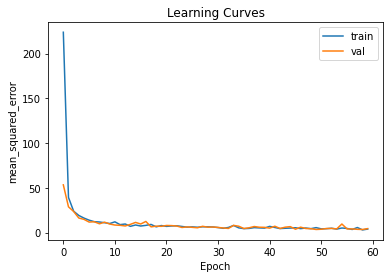

In [10]:
from matplotlib import pyplot
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('mean_squared_error')
pyplot.plot(model_history.history['loss'], label='train')
pyplot.plot(model_history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [11]:
result_dnn = autoencoder.predict(X_test)
latent_dnn = encoder.predict(X_test)

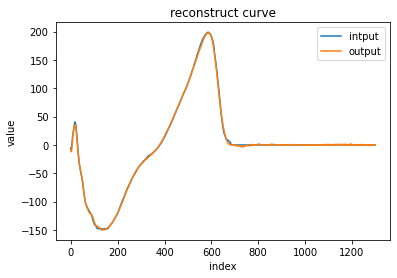

In [12]:
# reconstruct_test[1, :]
i = 1
pyplot.title('reconstruct curve')
pyplot.xlabel('index')
pyplot.ylabel('value')
pyplot.plot(X_test[i, :], label='intput')
pyplot.plot(result_dnn[i, :], label='output')
pyplot.legend()
pyplot.show()

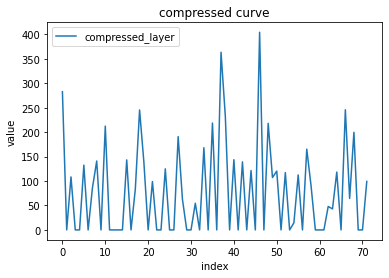

In [13]:
pyplot.title('compressed curve')
pyplot.xlabel('index')
pyplot.ylabel('value')
pyplot.plot(latent_dnn[i, :], label='compressed_layer')
pyplot.legend()
pyplot.show()

In [14]:
np.savetxt('Results/result_dnn.csv',result_dnn,delimiter=",")
np.savetxt('Results/latent_dnn.csv',latent_dnn,delimiter=",")

In [15]:
autoencoder.save("Results/dnn_autoencoder.h5", include_optimizer=True)